# Detect Password Strength
### Objective : Create a model to detect the strength of any password.
- This will be solved using **Multiclass Classification NLP and Machine Learning**
- Password strength is determined by multiple factors. Some of them are:
    - Length of the password
    - Choice of characters used
    - Combination of the chosen characters
    - and more . . . 
- Here we will apply NLP and each character in the password will prove essential to our analysis

# 1. Import Dependencies

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns

# configurations
%matplotlib inline
sns.set_style('whitegrid')

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

- `','` - comma separated value
- `error_bad_lines=False` - skips the rows that are not properly comma-separated values

# 2. Exploratory Data Analysis

## 2a. Explore Dataset

In [3]:
# preview dataset
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
# dimensions
print('# Rows    : ', df.shape[0])
print('# Columns : ', df.shape[1])

# Rows    :  669640
# Columns :  2


In [5]:
# metadata - features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
password    669639 non-null object
strength    669640 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


- 1 missing record in the `password` feature of the dataset
- which we will treat in future

In [6]:
# features
for i in df.columns: print(i)

password
strength


#### Data Dictionary
- `password` contains all the passwords that are a combination of alphabets, numbers and special characters
- `strength` is the dependent variable
- `strength`
    - 0 means weak password
    - 1 means strong password
    - 2 means very strong password

In [7]:
# dataset composition
df.nunique()

password    669639
strength         3
dtype: int64

## 2b. Univariate Analysis

In [8]:
# value counts
df['strength'].value_counts()

1    496801
0     89702
2     83137
Name: strength, dtype: int64

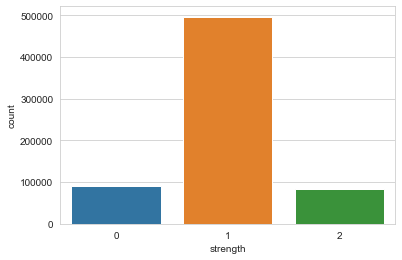

In [9]:
# count plot
sns.countplot(x='strength', data=df)

- `strength = 1` has the most number of entries in the dataset

# 3. Delete null values

In [10]:
# calculate null values
df.isnull().sum()

password    1
strength    0
dtype: int64

In [11]:
# record containing null value
df[df['password'].isnull()]

,password,strength
367579,NaN,0


In [12]:
# drop null record
df.dropna(inplace=True)

In [13]:
# dimensions
    # Rows    :  669640
    # Columns :  2
print('# Rows    : ', df.shape[0])
print('# Columns : ', df.shape[1])

# Rows    :  669639
# Columns :  2


- null value successfully dropped

# 4. Feature Engineering

In [14]:
# create a tuple of all passwords and their strength
pwd_tuple = np.array(df)

In [15]:
# preview
pwd_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [16]:
# reshuffle the password since all records have been aligned based on their strengths
import random
random.shuffle(pwd_tuple)  # shuffle randomly for robustnes


In [17]:
# preview
pwd_tuple

array([['kzde5577', 1],
       ['kzde5577', 1],
       ['kino3434', 1],
       ...,
       ['sinena193', 1],
       ['otexyqy837', 1],
       ['wpkatgyxz2', 1]], dtype=object)

### Split dataset based on dependent and independent features

In [18]:
# dependent feature
y = [d[1] for d in pwd_tuple]

# independent feature
X = [d[0] for d in pwd_tuple]

In [19]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,


In [20]:
X

['kzde5577',
 'kzde5577',
 'kino3434',
 'megzy123',
 'megzy123',
 'kino3434',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'kino3434',
 'visi7k1yr',
 'kzde5577',
 'v1118714',
 '612035180tok',
 'kzde5577',
 'lamborghin1',
 'asv5o9yu',
 'u6c8vhow',
 'u6c8vhow',
 'idofo673',
 'asv5o9yu',
 'as326159',
 'lamborghin1',
 '6975038lp',
 '52558000aaa',
 'as326159',
 'kino3434',
 '6975038lp',
 'kino3434',
 'asv5o9yu',
 'schalke04',
 '612035180tok',
 'kino3434',
 'schalke04',
 'sbl571017',
 'memjan123',
 'intel1',
 '6975038lp',
 'fahad123',
 'schalke04',
 'as326159',
 'exitos2009',
 'megzy123',
 'megzy123',
 'intel1',
 'sbl571017',
 'kzde5577',
 'jytifok873',
 'a2531106',
 'intel1',
 'visi7k1yr',
 'asgaliu11',
 'lamborghin1',
 'fahad123',
 'g067057895',
 'ok>bdk',
 'hpqkoxsn5',
 'trabajonet9',
 'pHyqueDIyNQ8vmhb',
 'idofo673',
 'gaymaids1',
 'patri1973',
 'prisonbreak1',
 '52558000aaa',
 'AVYq1lDE4MgAZfNt',
 'memjan123',
 'd04m11',
 'idofo673',
 'elyass15@ajilent-ci',
 'universe2908',
 'yk530mg8',
 'as32615

# 5. NLP + ML Modelling

## 5a. Vectorizer

In [21]:
# UDF to store all characters in each password
def word_divide_char(inputs):
    characters = []
    for i in inputs:
        characters.append(i)
    return characters

In [22]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)
X = vectorizer.fit_transform(X)

In [23]:
X.shape

(669639, 133)

- We have created a dataset of vectors for each character in the passwords

In [24]:
# print vocabulary of the vectors
vectorizer.vocabulary_

{'k': 62,
 'z': 77,
 'd': 55,
 'e': 56,
 '5': 35,
 '7': 37,
 'i': 60,
 'n': 65,
 'o': 66,
 '3': 33,
 '4': 34,
 'm': 64,
 'g': 58,
 'y': 76,
 '1': 31,
 '2': 32,
 'a': 52,
 'v': 73,
 'q': 68,
 'l': 63,
 'f': 57,
 't': 71,
 's': 70,
 'r': 69,
 '8': 38,
 '6': 36,
 '0': 30,
 'b': 53,
 'h': 59,
 '9': 39,
 'u': 72,
 'c': 54,
 'w': 74,
 'p': 67,
 'j': 61,
 'x': 75,
 '>': 43,
 '@': 45,
 '-': 27,
 '!': 17,
 '.': 28,
 '_': 50,
 ';': 40,
 '&': 22,
 '?': 44,
 '<': 41,
 ' ': 16,
 '$': 20,
 '"': 18,
 '~': 81,
 '+': 26,
 '^': 49,
 '/': 29,
 ')': 24,
 '#': 19,
 '%': 21,
 '*': 25,
 '(': 23,
 'ú': 124,
 '[': 46,
 ']': 48,
 '\\': 47,
 '`': 51,
 'þ': 128,
 'ó': 120,
 '\x1c': 14,
 '±': 94,
 '=': 42,
 '{': 78,
 'ô': 121,
 '}': 80,
 '\x16': 10,
 'ò': 119,
 '·': 100,
 '\x1e': 15,
 '³': 96,
 '\x19': 12,
 'ä': 110,
 '\x7f': 82,
 '°': 93,
 'õ': 122,
 '¾': 103,
 '|': 79,
 'à': 107,
 'á': 108,
 'º': 102,
 '¡': 86,
 'å': 111,
 'ÿ': 129,
 '´': 97,
 '\x05': 2,
 '\x1b': 13,
 'ß': 106,
 '‚': 131,
 '÷': 123,
 'ð': 117,
 

### Let us explore the tfidf values of the vectors

In [25]:
# take the first record for instance
df.iloc[0,0]

'kzde5577'

In [26]:
feature_names = vectorizer.get_feature_names()

# get tfidf vector for first document
first_document_vector = X[0]

# print the scores
data = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
data.sort_values(by=["tfidf"], ascending=False)

,tfidf
7,0.591282
5,0.567515
z,0.335766
k,0.291844
d,0.285376
e,0.221274
«,0.000000
¤,0.000000
¦,0.000000
¨,0.000000


## 5b. Logistic Regression

In [27]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

In [28]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

#### One-vs-Rest (OvR) Logistic Regression Classifier

In [29]:
# 'ovr' = one-vs-rest
# initialise LogisticRegression with parameters to make it multi-class classifier
log_clf_ovr = LogisticRegression(penalty='l2', multi_class='ovr')  # initi

In [30]:
# model training
log_clf_ovr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# model evaluation
print(log_clf_ovr.score(X_test, y_test))

0.8128696015769667


- 81% score of the OVR Logistic Regression classifier

#### Multinomial Logistic Regression Classifier

In [32]:
# multi_class='multinomial'
log_clf_multi = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [33]:
# model training
log_clf_multi.fit(X_train, y_train)  # train model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# model evaluation
print(log_clf_multi.score(X_test, y_test))

0.8196344304402365


#### Model Scores
- Logistic Regression Score : 81.96%

### Model Prediction - Logistic Regression

In [56]:
# UDF to predict password strength
def pwd_predict(prediction):
    if prediction == 0:
        return "Weak Password"
    elif prediction == 1:
        return "Strong Password"
    else:
        return "Super Strong Password"

### One-vs-Rest Logistic Regression Classifier

In [57]:
X_predict = np.array(["abcd"])
X_predict = vectorizer.transform(X_predict)
y_pred = log_clf_ovr.predict(X_predict)
pwd_predict(y_pred)

'Weak Password'

In [58]:
X_predict = np.array(["@123"])
X_predict = vectorizer.transform(X_predict)
y_pred = log_clf_ovr.predict(X_predict)
pwd_predict(y_pred)

'Strong Password'

In [59]:
X_predict = np.array(["Utkarsh@123"])
X_predict = vectorizer.transform(X_predict)
y_pred = log_clf_ovr.predict(X_predict)
pwd_predict(y_pred)

'Super Strong Password'

### Multinomial Logistic Regression Classifier

In [60]:
X_predict = np.array(["abc"])
X_predict = vectorizer.transform(X_predict)
y_pred = log_clf_multi.predict(X_predict)
pwd_predict(y_pred)

'Weak Password'

In [61]:
X_predict = np.array(["Utkarsh123"])
X_predict = vectorizer.transform(X_predict)
y_pred = log_clf_multi.predict(X_predict)
pwd_predict(y_pred)

'Strong Password'

In [62]:
X_predict = np.array(["Utkarsh@123"])
X_predict = vectorizer.transform(X_predict)
y_pred = log_clf_multi.predict(X_predict)
pwd_predict(y_pred)

'Super Strong Password'

## 5d. XGBoost

In [42]:
!pip install xgboost

In [46]:
# import XGBoost
import xgboost as xgb

In [47]:
# initialise XGBClassifier
xgb_classifier = xgb.XGBClassifier()
# train model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [48]:
# xgb model evaluation
xgb_classifier.score(X_test, y_test)

0.9150513708858491

#### Model Scores
- Logistic Regression Score : 81.96%
- XGBClassifier Score       : 91.51%

### Model Prediction : XGB Classifier

In [55]:
X_predict = np.array(["abc"])
X_predict = vectorizer.transform(X_predict)
y_pred = xgb_classifier.predict(X_predict)
# print(y_pred)
pwd_predict(y_pred)

'Weak Password'

In [63]:
X_predict = np.array(["123@abc"])
X_predict = vectorizer.transform(X_predict)
y_pred = xgb_classifier.predict(X_predict)
pwd_predict(y_pred)

'Strong Password'

In [64]:
X_predict = np.array(["Utkarsh@123"])
X_predict = vectorizer.transform(X_predict)
y_pred = xgb_classifier.predict(X_predict)
pwd_predict(y_pred)

'Strong Password'

## 5e. Multinomial Naive Bayes
- Generally used for text based processing

In [65]:
# import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

In [66]:
# initialize MultinomialNB classifier
nb_classifier= MultinomialNB()
# train model
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
# model evaluation
nb_classifier.score(X_test,y_test)

0.7436533062541066

#### Model Scores
- Logistic Regression Score : 81.96%
- XGBClassifier Score       : 91.51%
- Multinomial Naive Bayes : 74.36%

### Model Prediction : MultinomialNB

In [68]:
X_predict = np.array(["abc"])
X_predict = vectorizer.transform(X_predict)
y_pred = nb_classifier.predict(X_predict)
# print(y_pred)
pwd_predict(y_pred)

'Strong Password'

- Model is not predicting well, therefore, we will not use this model

# Conclusion
- XGBoost performed the best for predicting the password strength with 91% accuracy